In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm
from matplotlib import rcParams

# making sure plots & clusters are reproducible
np.random.seed(42)

In [2]:
# directory paths
master_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_exvivo/01_data/NicheNet_outputs/treatment_effect_cell_circuit/'
fig_dir = '/home/niklas/projects/niche_environments_FIBROSIS/HUMAN_invivo_exvivo_comparison/02_figures/ASK_joint/'

In [3]:
## plotting variables
plt.rcParams['figure.figsize'] = (8, 48)
plt.rcParams['pdf.fonttype'] = 42

In [4]:
## read cmp4 table
t1 = pd.read_csv(master_dir + 'exvivo_MASTER_treatment_cmp4_cell_circuit_top50.csv', index_col=0)
t1.head(5)

,ligand,treatment_effect_cmp4.Aberrant_Basaloid,treatment_effect_cmp4.ectopic_EC,treatment_effect_cmp4.Myofibroblasts,treatment_effect_cmp4.Pericytes,treatment_effect_cmp4.Profibrotic_Macrophages
PTGS2,PTGS2,0.0,NaN,NaN,NaN,NaN
INHBA,INHBA,-1.0,-1.0,-1.0,-1.0,-1.0
CXCL5,CXCL5,0.0,-1.0,-1.0,-1.0,NaN
FBN1,FBN1,-1.0,-1.0,0.0,NaN,1.0
LAMB2,LAMB2,-1.0,-1.0,-1.0,NaN,NaN


In [5]:
t1.shape

(159, 6)

In [6]:
## read nintedanib table
t2 = pd.read_csv(master_dir + 'exvivo_MASTER_treatment_nintedanib_cell_circuit_top50.csv', index_col=0)
t2.head(5)

,ligand,treatment_effect_nintedanib.Aberrant_Basaloid,treatment_effect_nintedanib.ectopic_EC,treatment_effect_nintedanib.Myofibroblasts,treatment_effect_nintedanib.Pericytes,treatment_effect_nintedanib.Profibrotic_Macrophages
PTGS2,PTGS2,-1.0,NaN,NaN,NaN,NaN
INHBA,INHBA,-1.0,-1.0,0.0,-1.0,0.0
CXCL5,CXCL5,0.0,-1.0,-1.0,-1.0,NaN
FBN1,FBN1,-1.0,-1.0,-1.0,NaN,NaN
LAMB2,LAMB2,-1.0,-1.0,0.0,NaN,1.0


In [7]:
t2.shape

(159, 6)

In [8]:
### merge both tables
master = pd.concat([t1, t2], axis=1)

In [9]:
del master['ligand']

In [11]:
#order = ['CXCL12','LAMB2','CXCL2','TNC','CCL21','BMP3','OCLN','BMP4','BMP2','NECTIN1','A2M','EDN1',
#        'CCL20','COL1A1','NCAM1','HLA-A','CX3CL1','CCL28','INHBB','INHBA','ITGAM',
#        'GAS6','ADAM17','TNFSF12','HMGB1','TNF','SAA1','TNFSF4','TNFSF13B','VWF',
#        'CXCL16','EFNA4','CDH1','KISS1','PTPRT','SERPING1','CLCF1','LIF','NMB','CXCL5',
#        'NAMPT','ANXA1','IL15','ICAM1','HBEGF','CD226','IL18','PTPRF','PNOC',
#        'ADM','TIGIT','HLA-G','HLA-E','C3','HGF','HMGB2','IL7','PVR','PLAU','ITGB2','HLA-DRA',
#        'DUSP18','PTPRC','FGF1','CSF3','CD80','ANGPT1','CCL4','FN1','CMTM8','OSM','MMP9',
#        'VEGFC','GPI','CELSR1','TNFSF10','SEMA4D','AIMP1','CD86','FGF7','COL5A3',
#        'SEMA3B','WNT2','OMG','SEMA3A','ADAM12','CRLF1','TNFSF14','JAG2','LAMB1','JAM2','BMP6',
#        'WNT5A','JAM3','CDH5','THBS2','JAG1','APLN','IGF1','APP','EFNA1','CDH3','PTPRM','CALR',
#        'MIF','CXCL6','CD28','POMC','IL11','TNFSF9','ANGPT2','PDGFB','APOE','PGF','CCL3',
#        'CCL3L3','CCL2','CCL13','C5','SPP1','GMFB','PCDH1','ITGB7','ITGB1','NTN4','COL4A1','SELPLG',
#        'CALM1','CALM2','AREG','CCL5','PKD1','PDGFA','TSLP','GDF11','PIK3CB','CEACAM1','EBI3',
#        'TGFB3','BMP7','TGFB1','HAS2','FGF2','IL1RN','IL1B','IL1A','IL33','IL24'
#]

In [12]:
#master = master.transpose()
#master = master[order]
#master = master.transpose()

In [13]:
df1 = master[['treatment_effect_cmp4.Aberrant_Basaloid',
              'treatment_effect_cmp4.ectopic_EC',
              'treatment_effect_cmp4.Myofibroblasts',
              'treatment_effect_cmp4.Pericytes',
              'treatment_effect_cmp4.Profibrotic_Macrophages'
             ]]
df2 = master[['treatment_effect_nintedanib.Aberrant_Basaloid',
              'treatment_effect_nintedanib.ectopic_EC',
              'treatment_effect_nintedanib.Myofibroblasts',
              'treatment_effect_nintedanib.Pericytes',
              'treatment_effect_nintedanib.Profibrotic_Macrophages'
             ]]

In [14]:
### this whole triangle thing only work if both dataframes have the same number of columns
#df2['treatment_effect_nintedanib.Airway_Epithelium'] = np.nan
#df2['treatment_effect_nintedanib.capillary_EC'] = np.nan

In [15]:
### this whole triangle thing only makes sense if order of colums is identical in both dataframes
#df2 = df2[['treatment_effect_nintedanib.Airway_Epithelium',
#           'treatment_effect_nintedanib.Alveolar_Epithelium',
#           'treatment_effect_nintedanib.capillary_EC',
#           'treatment_effect_nintedanib.vascular_EC',
#           'treatment_effect_nintedanib.lymphatic_EC',
#           'treatment_effect_nintedanib.Fibroblasts',
#           'treatment_effect_nintedanib.SMC_Pericytes',
#           'treatment_effect_nintedanib.Macrophages',
#           'treatment_effect_nintedanib.DC',
#           'treatment_effect_nintedanib.Mast_cells',
#           'treatment_effect_nintedanib.B_cells',
#           'treatment_effect_nintedanib.Plasma_cells',
#           'treatment_effect_nintedanib.T_cells',
#           'treatment_effect_nintedanib.NK_cells'
#             ]]

In [16]:
#### test with dummies
### this whole triangle thing only makes sense if order of colums is identical in both dataframes
#df1 = df1[['treatment_effect_cmp4.Alveolar_Epithelium',
#           'treatment_effect_cmp4.Fibroblasts',
#           'treatment_effect_cmp4.Macrophages'
#             ]]
#df2 = df2[['treatment_effect_nintedanib.Alveolar_Epithelium',
#           'treatment_effect_nintedanib.Fibroblasts',
#           'treatment_effect_nintedanib.Macrophages'
#             ]]

In [17]:
df1 = df1 + 2
df2 = df2 + 2
df1 = df1.fillna(0)
df2 = df2.fillna(0)

In [18]:
#df1 = df1.loc[['CCL3','LAMB2','CMTM8','HLA-A'],]
#df2 = df2.loc[['CCL3','LAMB2','CMTM8','HLA-A'],]

In [19]:
a1 = df1.to_numpy()
a2 = df2.to_numpy()

In [20]:
from matplotlib.tri import Triangulation

In [21]:
M = a1.shape[1] # number of columns
N = a1.shape[0] # number of rows
x = np.arange(M + 1)
y = np.arange(N + 1)
xs, ys = np.meshgrid(x, y)

triangles1 = [(i + j*(M+1), i+1 + j*(M+1), i + (j+1)*(M+1)) for j in range(N) for i in range(M)]
triangles2 = [(i+1 + j*(M+1), i+1 + (j+1)*(M+1), i + (j+1)*(M+1)) for j in range(N) for i in range(M)]
triang1 = Triangulation(xs.ravel(), ys.ravel(), triangles1)
triang2 = Triangulation(xs.ravel(), ys.ravel(), triangles2)

In [22]:
from matplotlib.colors import ListedColormap
cmap1 = ListedColormap(['white', plt.cm.tab20(0),plt.cm.tab20(14),plt.cm.tab20(2)], N=4)
cmap2 = ListedColormap(['white', plt.cm.tab20(18),plt.cm.tab20(15),plt.cm.tab20(6)], N=4)

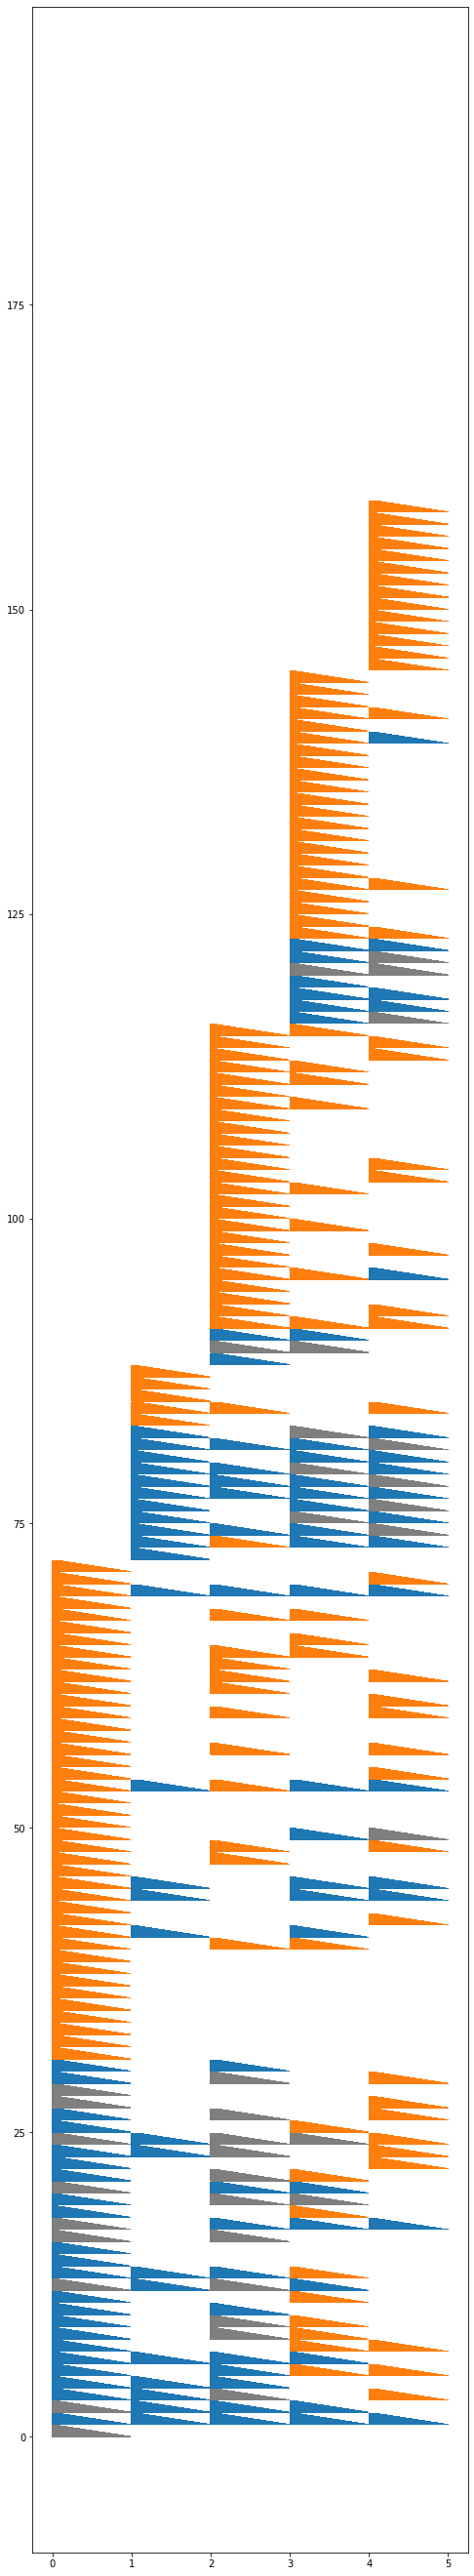

In [23]:
img1 = plt.tripcolor(triang1, a1.ravel(), cmap = cmap1)

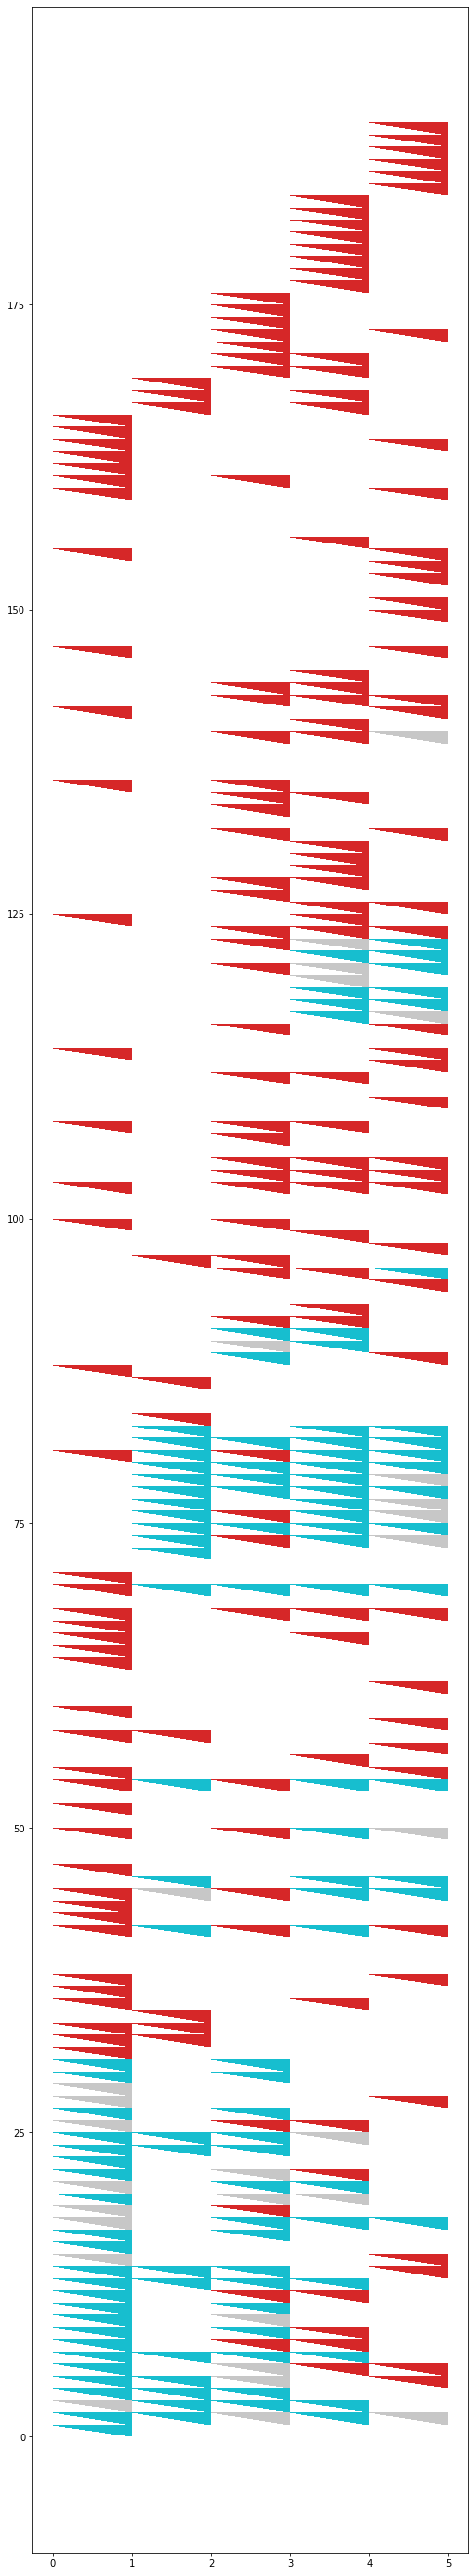

In [24]:
img2 = plt.tripcolor(triang2, a2.ravel(), cmap = cmap2)

In [25]:
df1

,treatment_effect_cmp4.Aberrant_Basaloid,treatment_effect_cmp4.ectopic_EC,treatment_effect_cmp4.Myofibroblasts,treatment_effect_cmp4.Pericytes,treatment_effect_cmp4.Profibrotic_Macrophages
PTGS2,2.0,0.0,0.0,0.0,0.0
INHBA,1.0,1.0,1.0,1.0,1.0
CXCL5,2.0,1.0,1.0,1.0,0.0
FBN1,1.0,1.0,2.0,0.0,3.0
LAMB2,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...
CCL3L3,0.0,0.0,0.0,0.0,0.0
BMP7,0.0,0.0,0.0,0.0,0.0
BMP2,0.0,0.0,0.0,0.0,0.0
DLL1,0.0,0.0,0.0,0.0,0.0


In [26]:
df2

,treatment_effect_nintedanib.Aberrant_Basaloid,treatment_effect_nintedanib.ectopic_EC,treatment_effect_nintedanib.Myofibroblasts,treatment_effect_nintedanib.Pericytes,treatment_effect_nintedanib.Profibrotic_Macrophages
PTGS2,1.0,0.0,0.0,0.0,0.0
INHBA,1.0,1.0,2.0,1.0,2.0
CXCL5,2.0,1.0,1.0,1.0,0.0
FBN1,1.0,1.0,1.0,0.0,0.0
LAMB2,1.0,1.0,2.0,0.0,3.0
...,...,...,...,...,...
CCL3L3,0.0,0.0,0.0,0.0,3.0
BMP7,0.0,0.0,0.0,0.0,3.0
BMP2,0.0,0.0,0.0,0.0,3.0
DLL1,0.0,0.0,0.0,0.0,3.0


In [27]:
cell_type_names = ['Aberrant Basaloid',
                   'ectopic EC',
                   'Myofibroblasts',
                   'Pericytes',
                   'Profibrotic Macrophages',
                   ''
                  ]

In [28]:
gene_names = master.index.tolist()
gene_names.append('')

In [30]:
gene_names

['PTGS2',
 'INHBA',
 'CXCL5',
 'FBN1',
 'LAMB2',
 'EFNA1',
 'ITGB2',
 'THBS2',
 'SERPINE1',
 'PVR',
 'EFNB1',
 'WNT2',
 'MMP9',
 'COL18A1',
 'VEGFC',
 'NUCB2',
 'PGF',
 'ICAM1',
 'IL11',
 'SERPINA1',
 'IL1RN',
 'ANGPT2',
 'LAMB1',
 'NID1',
 'HLA-DRA',
 'SEMA3C',
 'GRN',
 'HAS2',
 'FGF2',
 'JAG2',
 'TNFSF10',
 'IL1A',
 'IL1B',
 'TNF',
 'CMTM8',
 'TGFA',
 'APOE',
 'HMGB1',
 'NGF',
 'BTC',
 'LIF',
 'IL33',
 'CSF3',
 'IL15',
 'IL6',
 'FN1',
 'ANXA1',
 'GMFB',
 'TNFSF12',
 'IL24',
 'CSF1',
 'C3',
 'APLN',
 'NAMPT',
 'CXCL12',
 'ALCAM',
 'CX3CL1',
 'PDGFB',
 'BMP4',
 'ADAM17',
 'ITGB1',
 'COL4A1',
 'TNFSF9',
 'CCL28',
 'KISS1',
 'EREG',
 'NMB',
 'CEACAM1',
 'HEBP1',
 'CXCL16',
 'LGALS3',
 'CADM4',
 'COL5A3',
 'TNC',
 'CDH1',
 'ADAM12',
 'COL1A1',
 'DSG2',
 'ADAM9',
 'F11R',
 'WNT5A',
 'AGRN',
 'MDK',
 'APP',
 'DLL4',
 'MIF',
 'CALR',
 'EDN1',
 'PLAT',
 'NTN4',
 'CMTM6',
 'LAMC2',
 'THBS1',
 'CDH23',
 'GAS6',
 'SERPING1',
 'GPNMB',
 'JAM2',
 'ADAM15',
 'AREG',
 'NEGR1',
 'FAT1',
 'CXCL6',
 'C

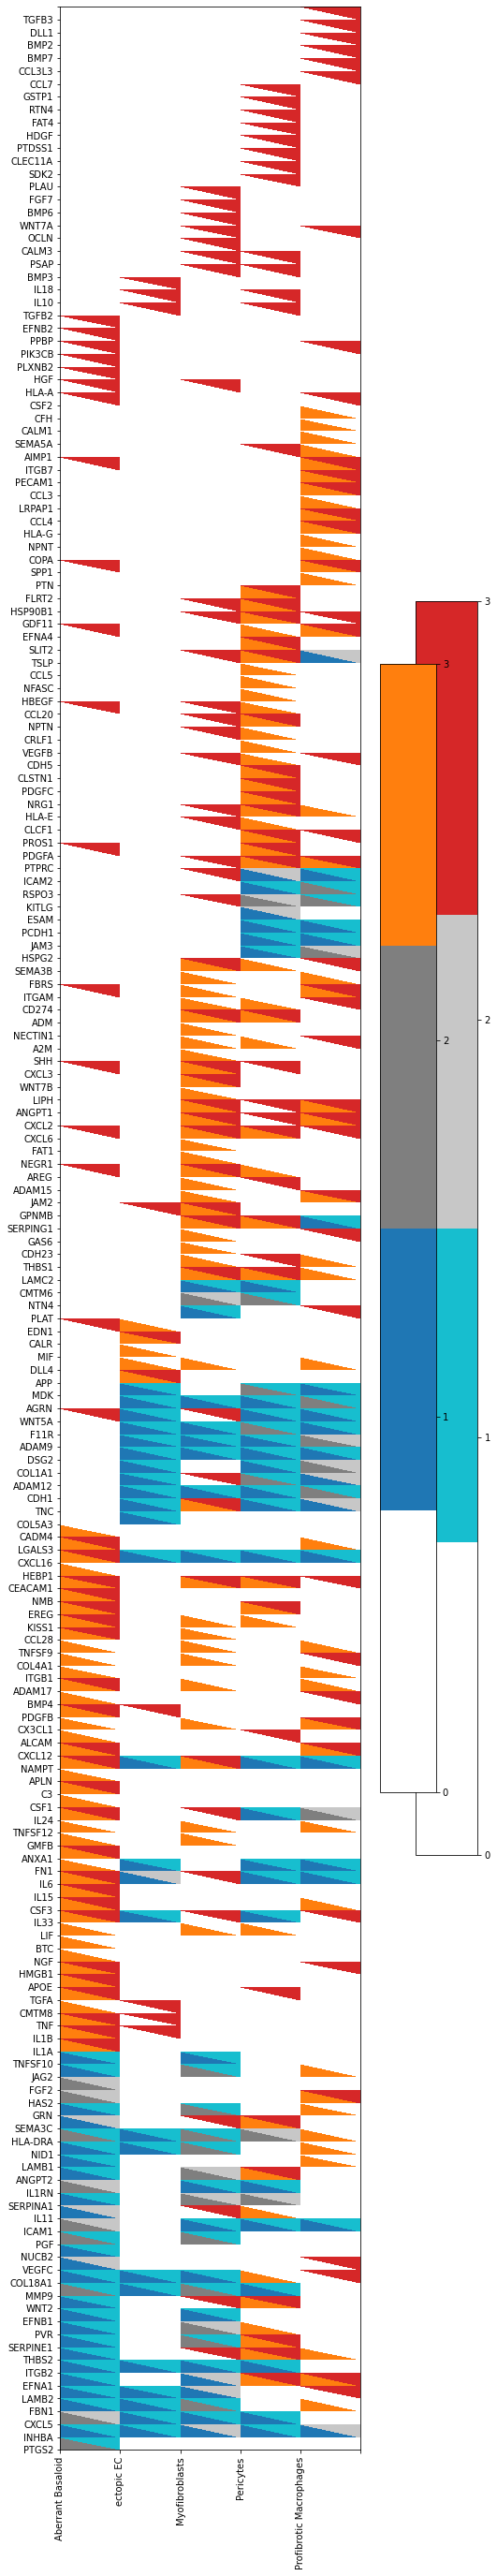

In [29]:
img1 = plt.tripcolor(triang1, a1.ravel(), cmap = cmap1)
img2 = plt.tripcolor(triang2, a2.ravel(), cmap = cmap2)
plt.colorbar(img2, ticks=range(10), pad=-0.05)
plt.colorbar(img1, ticks=range(10))
plt.xlim(x[0], x[-1])
plt.ylim(y[0], y[-1])
plt.xticks(x, cell_type_names, rotation=90)
plt.yticks(y, gene_names)
plt.savefig(fig_dir + '230105_NicheNet_MASTER_triangle_treatment_heatmap_cell_circuit.pdf', dpi=300, bbox_inches='tight')
plt.show()